# Part III, Lab 3
## Moments of distribution
1. create functions for mean, var and skew
2. apply your functions to a standard normal distribution of 1000 values
2. check your skew function against `scipy.stats.skew`

In [3]:
import numpy as np
def mean(x):
    '''
    calculates the mean of a series of numbers
    
    parameter:
    
    x: array or list of numbers
    '''
    
    n = len(x)
    return np.sum(x)/n

In [4]:
def var(x):
    '''
    calculates the variance of a series of numbers, calls the mean function.
    
    parameter:
    
    x: array or list of numbers
    '''
    
    n = len(x) -1
    mu = mean(x)
    
    if n==0.:
        return("Invalid sample variance: only one element given")
    
    return sum((x-mu)**2)/n
    

In [146]:
def skew(x):
    '''
    calculates the skew of a series of numbers, calls the mean function and var function.
    
    parameter:
    
    x: array or list of numbers
    
    '''
    
    n = len(x)
    mu = mean(x)
    sigma = math.sqrt(var(x))
    if sigma == 0.:
        return "Invalid skew, standard deviation/variance is zero"
    
    return (sum(((x-mu)/sigma)**3)/n)

In [147]:
from scipy import stats

In [159]:
example=random.standard_normal((1,1000)).flatten()

In [160]:
len(example)

1000

In [166]:
mean(example),var(example), skew(example)

(0.011812854884593129, 0.95119421839141505, 0.020807228635223496)

In [167]:
stats.skew(example)

0.020807228635223548

## Standard normal distribution
1. Create a distribution by adding to a first set of 500 data values that represent a standard normal distribtion a second distribution that you obtain by applying the following operation: $a \rightarrow 0.5a-1.5$. Make a histogram of that combined distribution with 20 bars.
2. Calculate the skew. Repeat the same exercise but applying for the second set the operation $a \rightarrow 0.3a+2.$

In [7]:
a=random.standard_normal((1,500))

In [8]:
b = 0.5*a - 1.5

In [9]:
c = append(a,b)

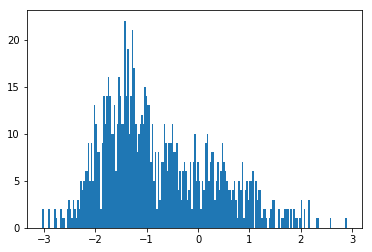

In [10]:
ifig=2;close(ifig);figure(ifig)
n=200
ah1=hist(c,n)

In [11]:
skew(c)

0.63645292914645424

In [12]:
d = 0.3*a + 2

In [13]:
e = append(a,d)

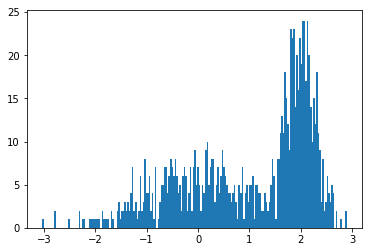

In [14]:
ifig=3;close(ifig);figure(ifig)

ah2=hist(e,n)

In [15]:
skew(e)

-0.69729713016927386

## Least-square fitting
Fit a Gaussian (propability denisty of the normal distribution) to bpth skewed distributions from the previous part.

In [93]:
def pdf_normal(x,mu,var):
    thing = sqrt(2*pi*var)
    thang = -(x-mu)**2/(2.*var)
    return exp(thang)/thing

<IPython.core.display.Javascript object>


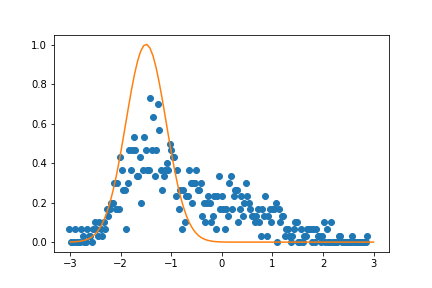

In [122]:
ifig=4;close(ifig);figure(ifig)
y=ah1[0]/((len(c.flatten())*6/n))
x=ah1[1][0:-1]+0.5*diff(ah1[1])
plot(x,y,'o')
xx = linspace(-3,3,100)
plot(xx,pdf_normal(xx,-1.5,sqrt(var(y))))

<IPython.core.display.Javascript object>


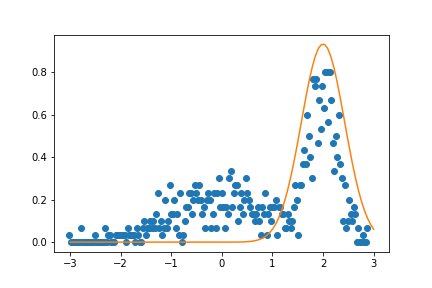

In [119]:
ifig=5;close(ifig);figure(ifig)
y=ah2[0]/((len(c.flatten())*6/n))
x=ah2[1][0:-1]+0.5*diff(ah2[1])
plot(x,y,'o')
xx = linspace(-3,3,100)
plot(xx,pdf_normal(xx,2,sqrt(var(y))))

## Linear correlation


1. create a point cloud by plotting to normal distribtions against each other. Each as 500 values.
2. Create a linear shear mapping transformation matrix `T2 = matrix([[1,1.],[0,1]])` to these double-normal (x,y) data points. Plot both data sets in one plot.
3. Write a function that calculates Pearson's r correlation coeffecient. Calculate the coefficent for both data sets. 
4. Compare your result with the equivalent `scipy.stats` routine.

In [44]:
%pylab nbagg
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


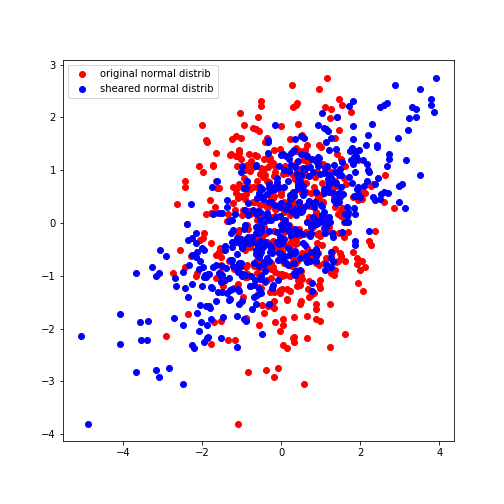

In [60]:
a=random.standard_normal((2,500))
figure(figsize=(7,7))

plt.plot(a[0],a[1],'ro', label = 'original normal distrib')

In [61]:
sy = 1.
T2 = matrix([[1,sy],[0,1]])

points = array([a[0], a[1]]).T

trans_points = []

for i in range(len(points)):
    temp = T2.dot(points[i]).A1
    trans_points.append(temp)
    
x1=array(trans_points).T[0]; y1=array(trans_points).T[1];

In [62]:
plt.plot(x1,y1,'bo', label = 'sheared normal distrib')
legend(loc=0)

In [76]:
def pear_coeff(x,y):
    '''
    calculates the Pearson's r coefficient for N pairs of values.
        calls mean function.
    
    parameters:
    x, y : arrays/lists, the two sets of values we want to calculate the coefficient for.
        must be the same length
    
    returns: the correlation coefficient.
    '''
    x = np.array(x)
    y = np.array(y)
    
    if len(x) != len(y):
        return "arrays are different lengths."
    xbar = x - mean(x)
    ybar = y - mean(y)
    
    if (sum(xbar) == 0):
        return "division by zero, yikers.";
    
    if (sum(ybar) == 0):
        return "division by zero, yikers.";
    
    
    numerator = sum(xbar*ybar)
    
    xbars = (xbar)**2
    ybars = (ybar)**2
    
    denominator = sqrt(sum(xbars))*sqrt(sum(ybars))
    
    return numerator/denominator;


In [77]:
pear_coeff(a[0],a[1])

0.046717323290325935

In [78]:
pear_coeff(x1,y1)

0.72803604071606898

In [91]:
stats.pearsonr(a[0],a[1]) #same result, wicked
#second value is p value, from a 2 tailed test

(0.046717323290325921, 0.29714015032361363)

In [92]:
stats.pearsonr(x1,y1) #same result, wicked

(0.72803604071606898, 1.0818358019249702e-83)